In [1]:
import sys, gc

sys.path.append('..')

from scripts.embeddings.comparison import *
from scripts.embeddings.extraction import *

from utils.utils import *

In [2]:
datasets = ["imdb", "spotify", "news"]

labels = [2, 5, 5]

sel_idx = 0

dataset_name, num_labels = datasets[sel_idx], labels[sel_idx]

model_name = "bert-base-uncased"

In [3]:
model_pt, tokenizer_pt = load_model_tok(dataset_name=dataset_name, model_name=model_name, ft=False, num_labels=num_labels)

train_loader, val_loader = load_and_preprocess_data(dataset_name=dataset_name, tokenizer=tokenizer_pt)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading pre-trained model...


In [4]:
# pt_embeddings = extract_embeddings(model_pt, val_loader)

# save_embeddings(pt_embeddings, dataset_name=dataset_name, model_name=model_name, ft=False)

pt_embeddings = load_embeddings(dataset_name=dataset_name, model_name=model_name, ft=False)

In [5]:
model_ft, tokenizer_ft = load_model_tok(dataset_name=dataset_name, model_name=model_name, ft=True, num_labels=num_labels)

train_loader, val_loader = load_and_preprocess_data(dataset_name=dataset_name, tokenizer=tokenizer_ft)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading fine-tuned model...


In [6]:
# ft_embeddings = extract_embeddings(model_ft, val_loader)

# save_embeddings(ft_embeddings, dataset_name=dataset_name, model_name=model_name, ft=True)

ft_embeddings = load_embeddings(dataset_name=dataset_name, model_name=model_name, ft=True)

Layer 0: Cosine Similarity = 0.9991
Layer 1: Cosine Similarity = 0.9916
Layer 2: Cosine Similarity = 0.9769
Layer 3: Cosine Similarity = 0.9619
Layer 4: Cosine Similarity = 0.9398
Layer 5: Cosine Similarity = 0.8997
Layer 6: Cosine Similarity = 0.8676
Layer 7: Cosine Similarity = 0.8364
Layer 8: Cosine Similarity = 0.8058
Layer 9: Cosine Similarity = 0.7512
Layer 10: Cosine Similarity = 0.7041
Layer 11: Cosine Similarity = 0.6539
Layer 12: Cosine Similarity = 0.4944


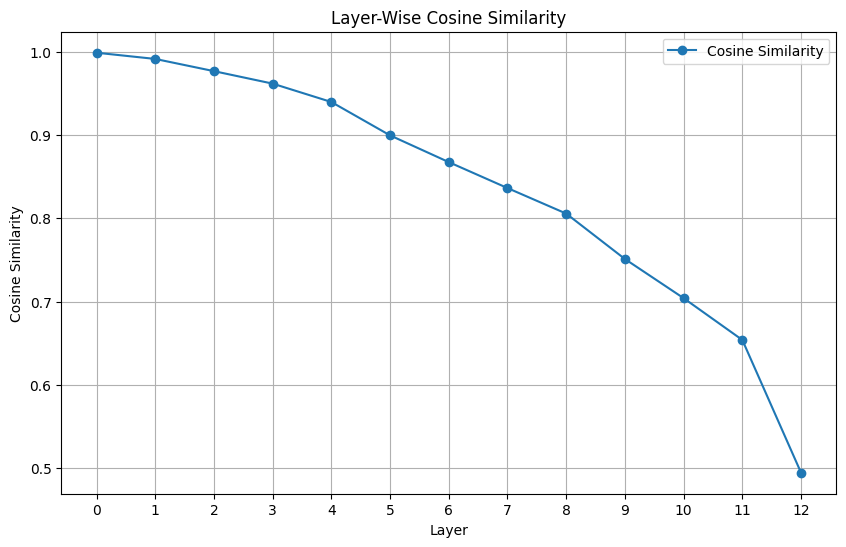

In [7]:
layer_similarity = compare_embeddings(pt_embeddings, ft_embeddings)

visualize_similarity(layer_similarity, dataset_name=dataset_name, model_name=model_name)

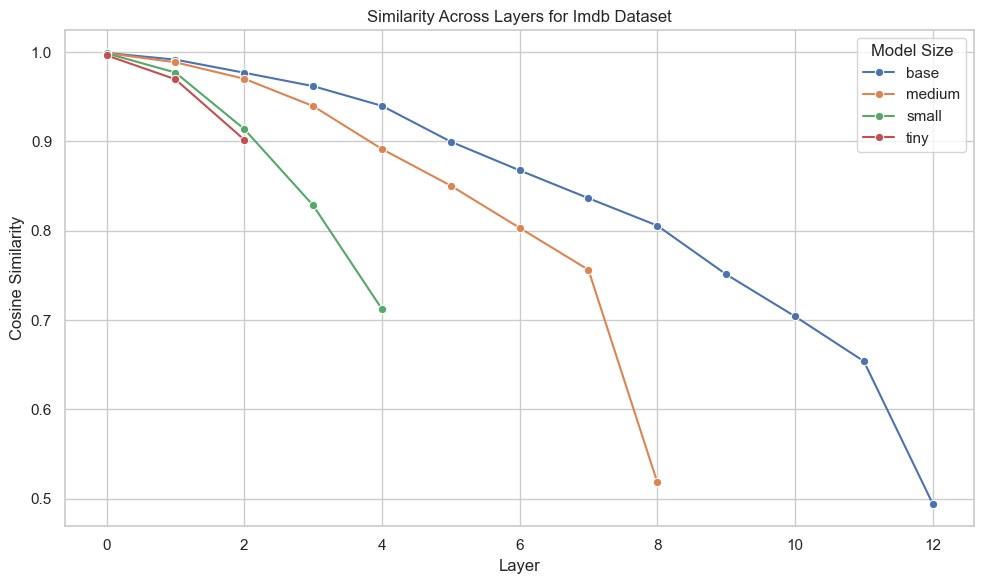

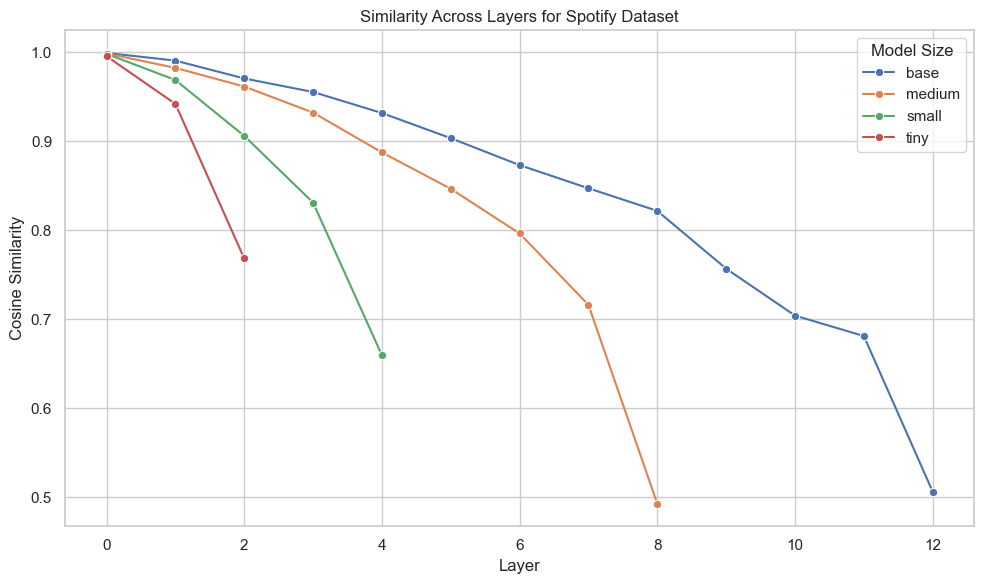

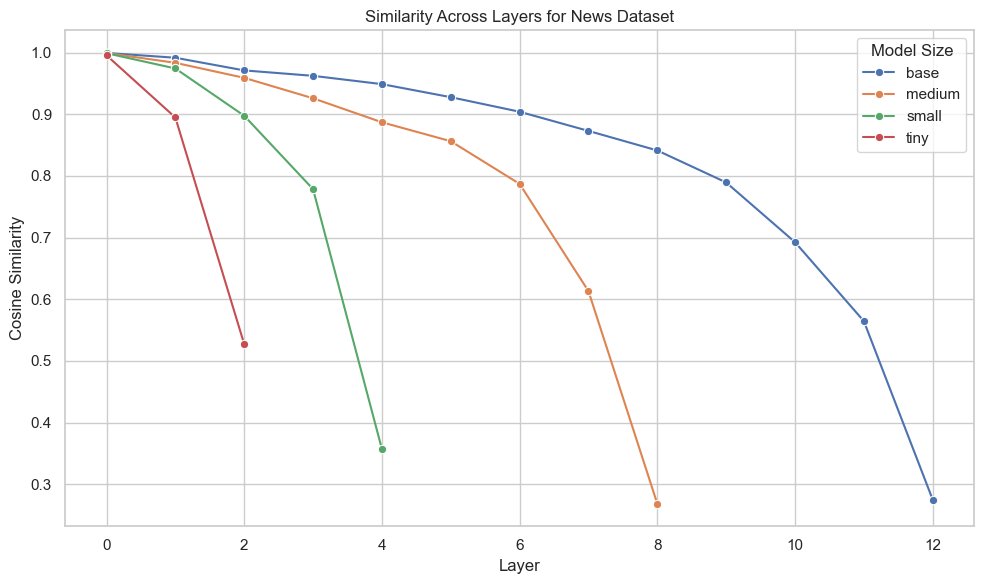

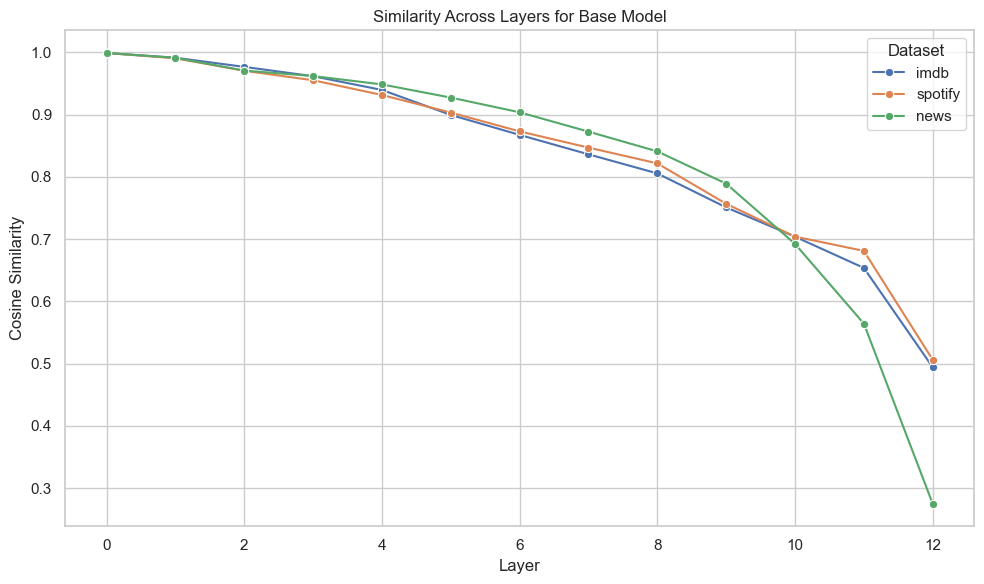

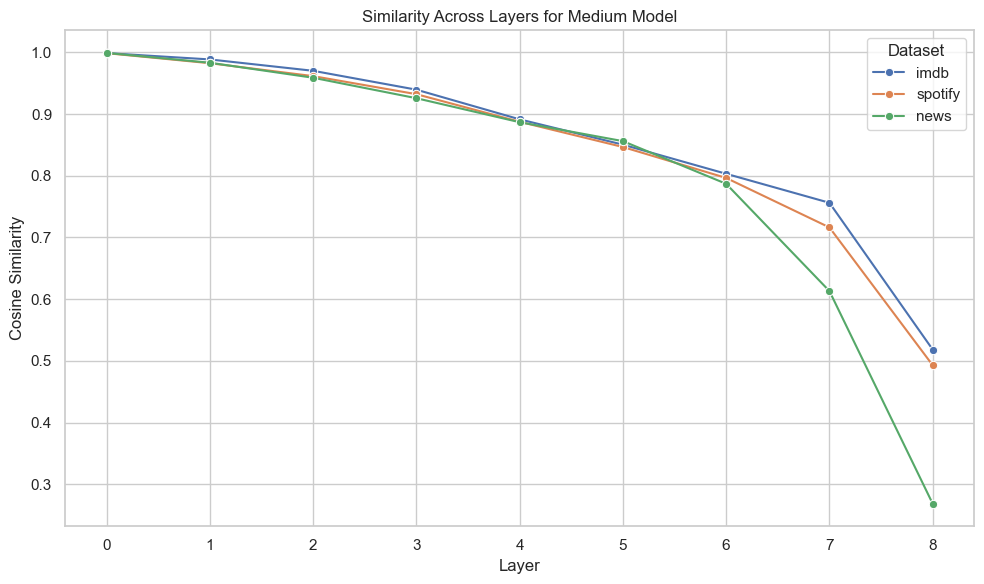

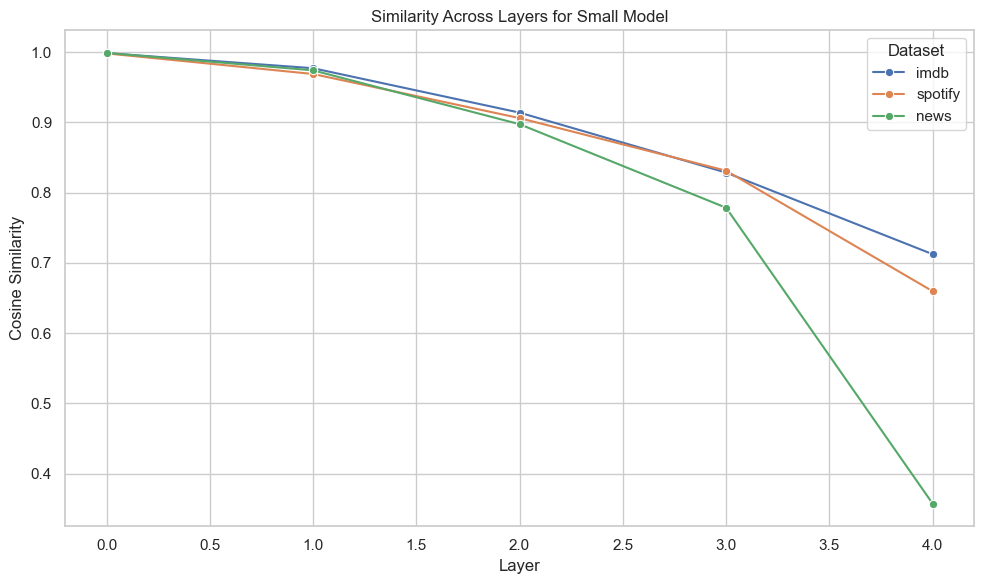

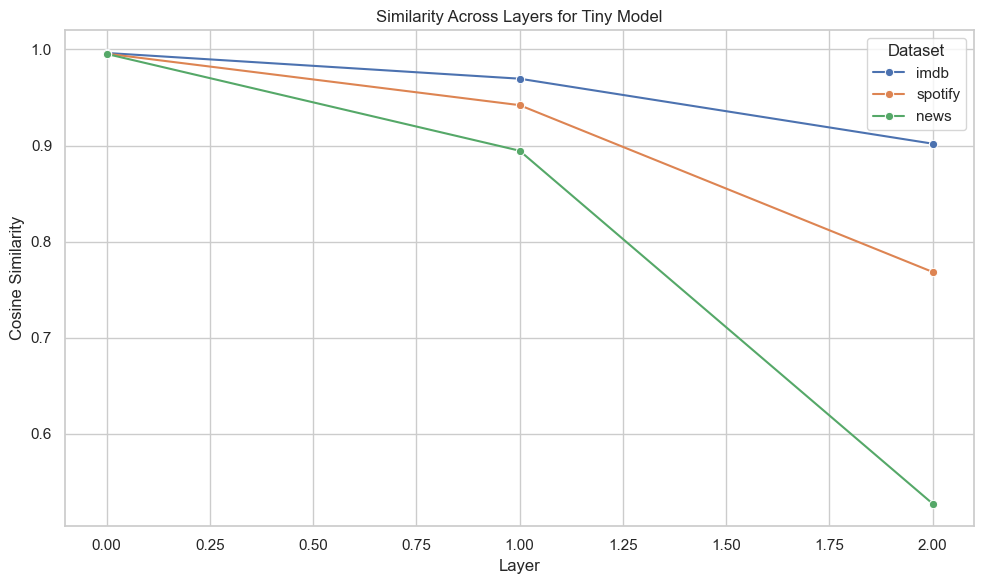

In [8]:
plot_summary()